# Regressão linear


In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.datasets import get_rdataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

pio.renderers.default = "png"

penguins: pd.DataFrame = get_rdataset("penguins", "palmerpenguins").data

penguins: pd.DataFrame = penguins.drop("year", axis="columns")

penguins: pd.DataFrame = penguins.dropna().reset_index(drop=True)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## Variáveis _dummies_ com _one-hot_ _enconding_


In [2]:
penguins_with_dummies: pd.DataFrame = pd.get_dummies(penguins, drop_first=True)

penguins_with_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
3,36.7,19.3,193.0,3450.0,0,0,0,1,0
4,39.3,20.6,190.0,3650.0,0,0,0,1,1


## _Ordinary_ _least_ _squares_


In [3]:
# Regressão linear simples com statsmodels.api

dependent: pd.Series = penguins["body_mass_g"]

independent: pd.DataFrame = sm.add_constant(penguins["flipper_length_mm"])

model_results = sm.OLS(dependent, independent).fit()

In [4]:
# Regressão linear múltipla com statsmodels.api

dependent = penguins["body_mass_g"]

independents: pd.DataFrame = penguins.loc[:, penguins.columns != "body_mass_g"]

independents: pd.DataFrame = independents.pipe(pd.get_dummies, drop_first=True).pipe(sm.add_constant)

model_results = sm.OLS(dependent, independents).fit()

In [5]:
# Regressão linear simples com statsmodels.formula.api

formula = "body_mass_g ~ flipper_length_mm"

model: sm.OLS = smf.ols(formula, penguins)

model_results = model.fit()

In [6]:
# Regressão linear múltipla com statsmodels.formula.api

formula = "body_mass_g ~ C(species) + C(island) + C(sex) + bill_length_mm + bill_depth_mm + flipper_length_mm"

model: sm.OLS = smf.ols(formula, penguins)

model_results = model.fit()

## Modelo de referência


In [7]:
formula = "body_mass_g ~ C(species) + C(island) + C(sex) + bill_length_mm + bill_depth_mm + flipper_length_mm"

model: sm.OLS = smf.ols(formula, penguins)

model_results = model.fit()

## Parâmetros


In [8]:
model_results.params

Intercept                 -1500.029095
C(species)[T.Chinstrap]    -260.306295
C(species)[T.Gentoo]        987.761445
C(island)[T.Dream]          -13.103051
C(island)[T.Torgersen]      -48.063626
C(sex)[T.male]              387.224255
bill_length_mm               18.189315
bill_depth_mm                67.575429
flipper_length_mm            16.238506
dtype: float64

## _Fitted_ _values_


In [9]:
model_results.fittedvalues

0      3753.163896
1      3366.559840
2      3567.803105
3      3557.692616
4      4031.341630
          ...     
328    4328.113870
329    3521.090279
330    3879.880344
331    4231.822470
332    3618.549923
Length: 333, dtype: float64

## Resíduos


In [10]:
model_results.resid

0       -3.163896
1      433.440160
2     -317.803105
3     -107.692616
4     -381.341630
          ...    
328   -328.113870
329   -121.090279
330   -104.880344
331   -131.822470
332    156.450077
Length: 333, dtype: float64

## Teste F


In [11]:
# Valor da estatística de teste

model_results.fvalue

284.07932797328783

In [12]:
# Graus de liberdade do numerador da distribuição F de Snedecor

model_results.df_model

8.0

In [13]:
# Graus de liberdade do denominador da distribuição F de Snedecor

model_results.df_resid

324.0

In [14]:
# p-value do valor da estatística de teste

model_results.f_pvalue

1.8518059590392813e-141

## Testes t de Student


In [15]:
# Valor das estatísticas de teste

model_results.tvalues

Intercept                 -2.605021
C(species)[T.Chinstrap]   -2.939634
C(species)[T.Gentoo]       7.197429
C(island)[T.Dream]        -0.223828
C(island)[T.Torgersen]    -0.788943
C(sex)[T.male]             8.044007
bill_length_mm             2.548812
bill_depth_mm              3.409235
flipper_length_mm          5.524321
dtype: float64

In [16]:
# Graus de liberdade da distribuição t de Student

model_results.df_resid

324.0

In [17]:
# p-values do valor da estatística de testes

model_results.pvalues

Intercept                  9.610484e-03
C(species)[T.Chinstrap]    3.522124e-03
C(species)[T.Gentoo]       4.299347e-12
C(island)[T.Dream]         8.230321e-01
C(island)[T.Torgersen]     4.307221e-01
C(sex)[T.male]             1.655310e-14
bill_length_mm             1.126981e-02
bill_depth_mm              7.337653e-04
flipper_length_mm          6.801240e-08
dtype: float64

## _R²_


In [18]:
# R²

model_results.rsquared

0.875223107235797

In [19]:
# R² ajustado

model_results.rsquared_adj

0.8721421963033475

## Teste de Shapiro-Wilk


In [20]:
residuals = model_results.resid

stats.shapiro(residuals)

ShapiroResult(statistic=0.9963915348052979, pvalue=0.6560391783714294)

## Gráfico com resíduos em função dos _fitted_ _values_


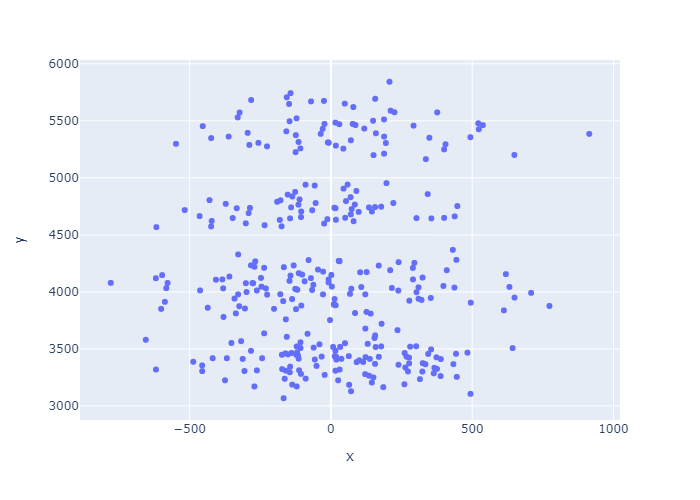

In [21]:
residuals = model_results.resid

fitted_values = model_results.fittedvalues

fig = px.scatter(x=residuals, y=fitted_values)

fig.show()

## _Variance_ _inflation_ _factor_


In [22]:
independents = model_results.model.exog

independents_names = model_results.model.exog_names

independents_index = range(len(independents_names))

pd.DataFrame(
    {
        "variavel": independents_names,
        "VIF": [variance_inflation_factor(independents, i) for i in independents_index],
    }
)

,variavel,VIF
0,Intercept,1331.892792
1,C(species)[T.Chinstrap],5.118487
2,C(species)[T.Gentoo],17.374570
3,C(island)[T.Dream],3.206594
4,C(island)[T.Torgersen],1.807214
5,C(sex)[T.male],2.326898
6,bill_length_mm,6.099673
7,bill_depth_mm,6.101621
8,flipper_length_mm,6.797579


## Resumo do modelo

In [23]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          1.85e-141
Time:                        08:44:36   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1500.0291    575.822     -2.605      0.010   -2632.852    -367.207
C(species)[T.Chinstrap]  -260.3063     88.551     -2.940      0.004    -434.513     -86.100
C(species)[T.Gentoo]      987.7614    137.238      7.197      0.000     717.771    1257.752
C(island)[T.Dream]        -13.1031     58.541     -0.224      0.823    -128.271     102.065
C(island)[T.Torgersen]    -48.0636     60.922     -0.789      0.431    -167.915      71.788
C(sex)[T.male]            387.2243     48.138      8.044      0.000     292.521     481.927
bill_length_mm             18.1893      7.136      2.549      0.011       4.150      32.229
bill_depth_mm              67.5754     19.821      3.409      0.001      28.581     106.570
flipper_length_mm          16.2385      2.939      5.524      0.000      10.456      22.021
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.101
Skew:                           0.139   Prob(JB):                        0.577
Kurtosis:                       2.958   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""